# 데이터셋

## 허깅페이스 데이터셋 처음 사용하기

In [1]:
from datasets import list_datasets

In [2]:
all_datasets = list_datasets()

/tmp/ipykernel_533721/374882858.py:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


In [3]:
print(f'현재 허브에는 {len(all_datasets)}개의 데이터셋이 있습니다')
print(f'처음 10개의 데이터셋: {all_datasets[:10]} : ')

현재 허브에는 100009개의 데이터셋이 있습니다
처음 10개의 데이터셋: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'allenai/ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews'] : 


In [4]:
from datasets import load_dataset
emotions = load_dataset('emotion')

/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/datasets/load.py:1429: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [5]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [7]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [8]:
train_ds.column_names

['text', 'label']

In [9]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [10]:
train_ds[:2]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'],
 'label': [0, 0]}

In [12]:
dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt?dl=1"
!wget {dataset_url}

--2024-01-25 20:20:08--  https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.84.18, 2620:100:6034:18::a27d:5412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.84.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/1pzkadrvffbqw6o/train.txt [following]
--2024-01-25 20:20:08--  https://www.dropbox.com/s/dl/1pzkadrvffbqw6o/train.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 404 Not Found
2024-01-25 20:20:08 ERROR 404: Not Found.



## 데이터셋에서 데이터프레임으로

In [13]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [19]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

In [20]:
df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [16]:
emotions["train"].features["label"]

ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)

## 클래스 분포 살펴보기

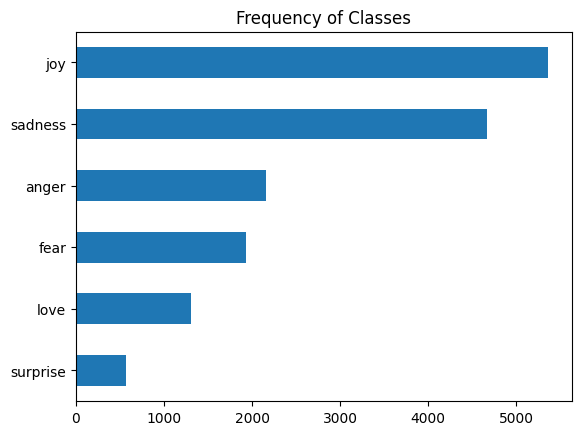

In [21]:
import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

## 트윗 길이 확인

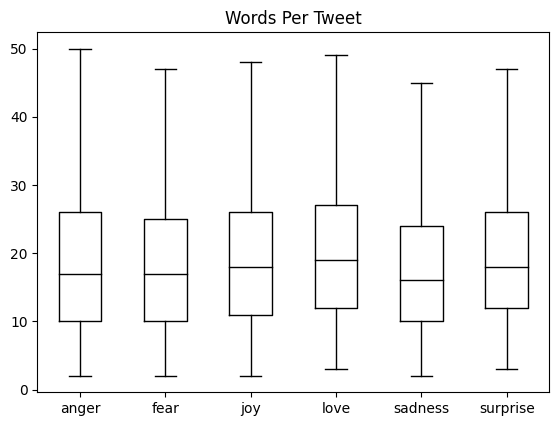

In [22]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False,
          showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [23]:
emotions.reset_format()

# 텍스트에서 토큰으로

## 문자 토큰화